# Census Income Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('census_income.csv')

In [3]:
df=pd.DataFrame(ds)

In [4]:
df.columns=['age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income']

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.shape

(32560, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education.num   32560 non-null  int64 
 5   marital.status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital.gain    32560 non-null  int64 
 11  capital.loss    32560 non-null  int64 
 12  hours.per.week  32560 non-null  int64 
 13  native.country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [9]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [10]:
df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [12]:
df['marital.status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [13]:
df.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [14]:
df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [15]:
df['native.country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [16]:
df.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
# convering ? value of workclass column in most appearing value
df.workclass=df.workclass.replace(' ?',df['workclass'].mode()[0])

In [18]:
df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

# Checking NUllValues

In [19]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

<AxesSubplot:>

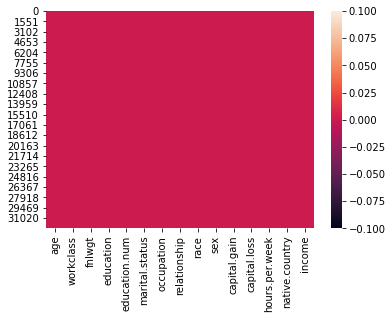

In [20]:
sns.heatmap(df.isnull())

There is no null values in this dataset

In [21]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='fnlwgt'>

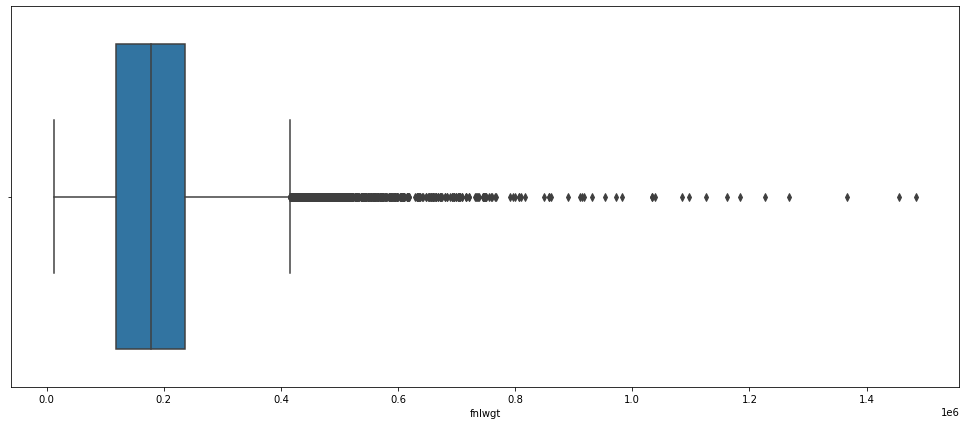

In [22]:
plt.figure(figsize=(17,7))
sns.boxplot(df.fnlwgt)

<AxesSubplot:xlabel='capital.gain'>

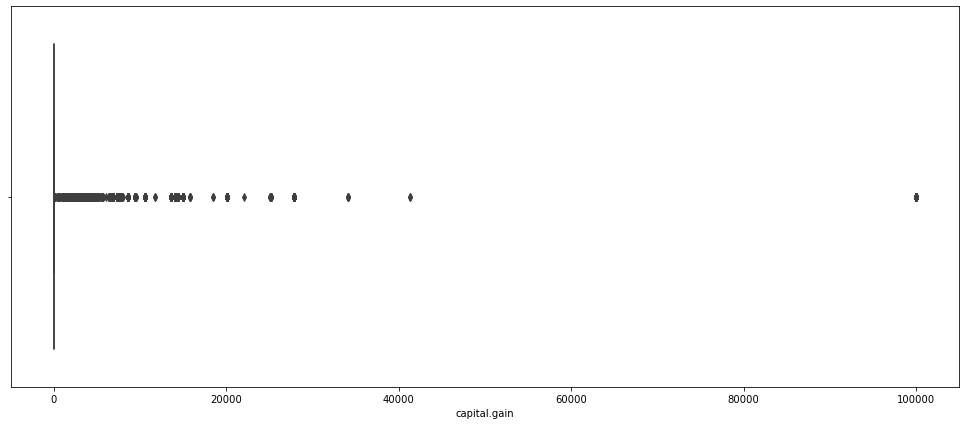

In [23]:
plt.figure(figsize=(17,7))
sns.boxplot(df['capital.gain'])

<AxesSubplot:xlabel='age'>

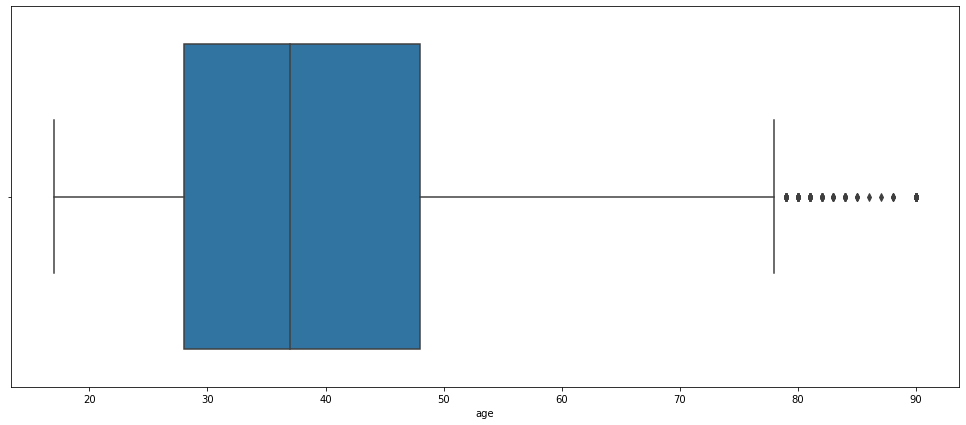

In [24]:
plt.figure(figsize=(17,7))
sns.boxplot(df.age)

<AxesSubplot:xlabel='capital.loss'>

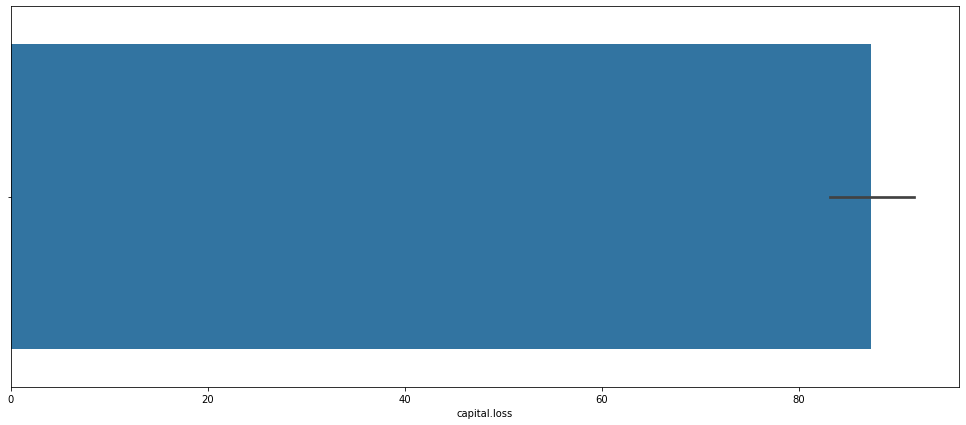

In [25]:
plt.figure(figsize=(17,7))
sns.barplot(df['capital.loss'])

<AxesSubplot:xlabel='education', ylabel='count'>

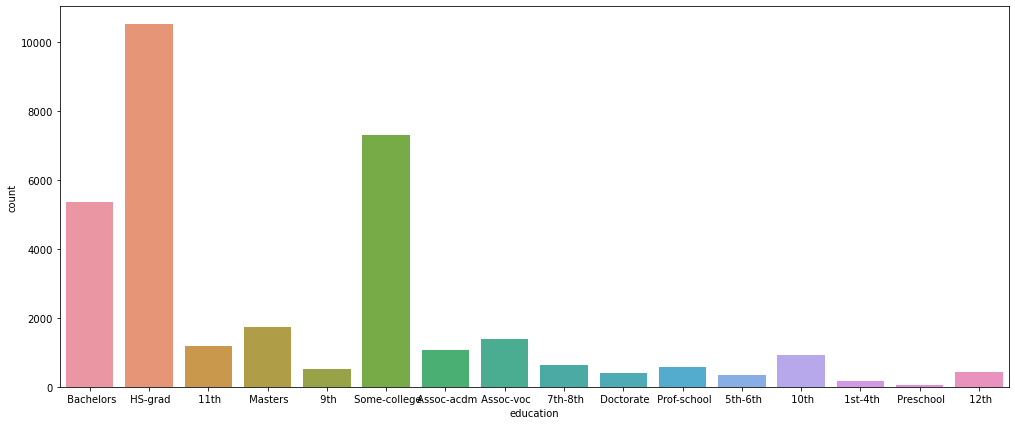

In [26]:
plt.figure(figsize=(17,7))
sns.countplot(df.education)

the most education level in this dataset is hs-grad

<AxesSubplot:xlabel='workclass', ylabel='count'>

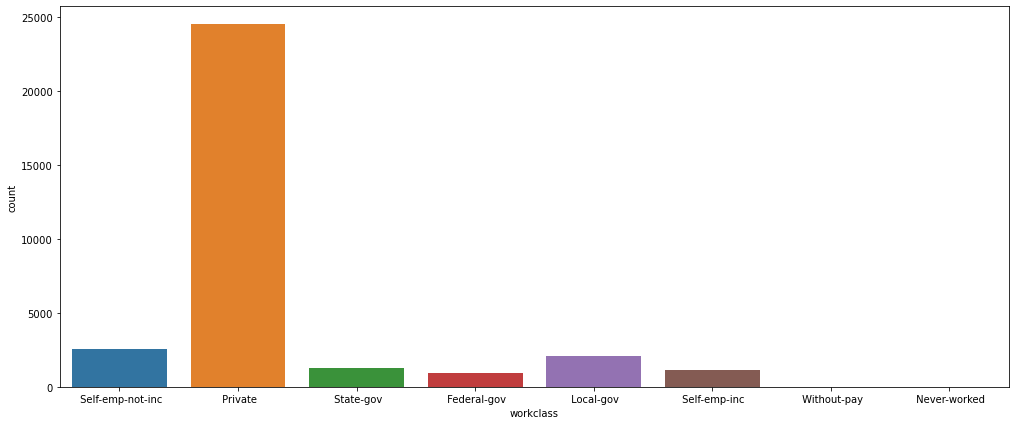

In [27]:
plt.figure(figsize=(17,7))
sns.countplot(df.workclass)

Private workclass is much higher in this dataset

<AxesSubplot:xlabel='marital.status', ylabel='count'>

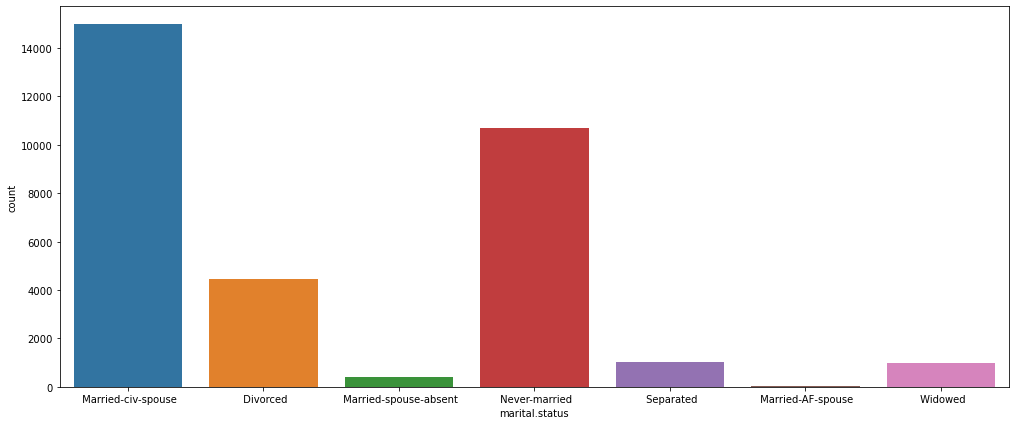

In [28]:
plt.figure(figsize=(17,7))
sns.countplot(df['marital.status'])

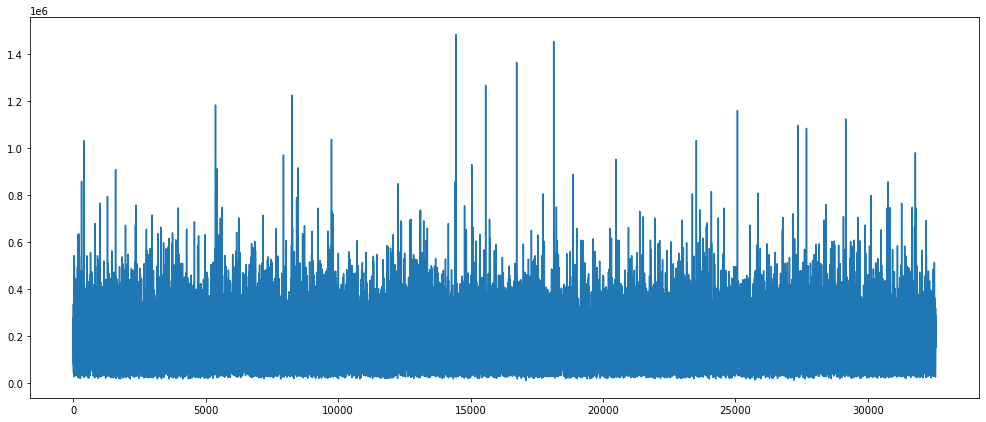

In [29]:
plt.figure(figsize=(17,7))
plt.plot(df.fnlwgt)

<AxesSubplot:xlabel='income', ylabel='age'>

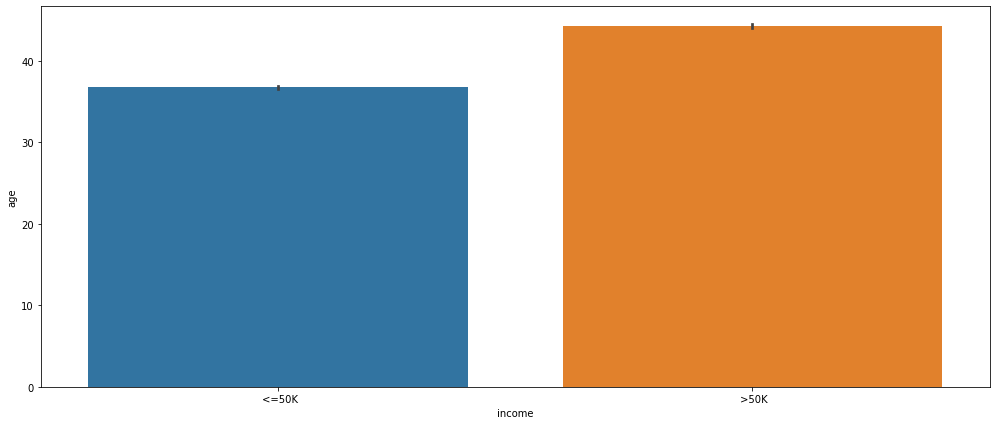

In [30]:
plt.figure(figsize=(17,7))
sns.barplot(df.income,df.age)

As age is increases salary also increase

<AxesSubplot:xlabel='income', ylabel='capital.loss'>

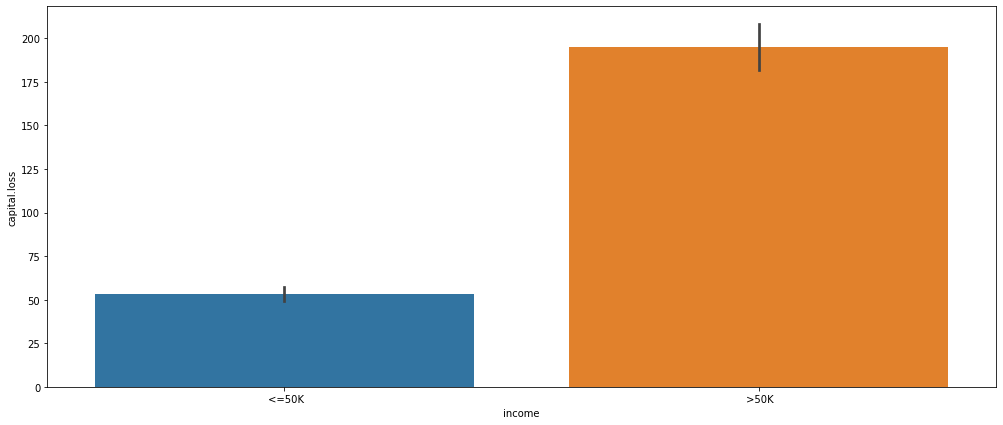

In [31]:
plt.figure(figsize=(17,7))
sns.barplot(df.income,df['capital.loss'])

when salary is increse then capital loss will also increase

<AxesSubplot:xlabel='income', ylabel='capital.gain'>

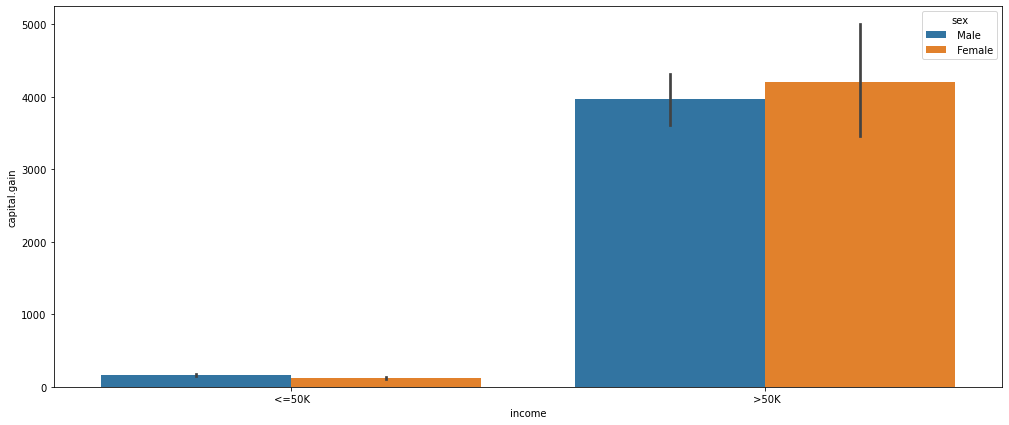

In [32]:
plt.figure(figsize=(17,7))
sns.barplot(df.income,df['capital.gain'],hue=df.sex)

(array([  736.,  2192.,  2317., 17734.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

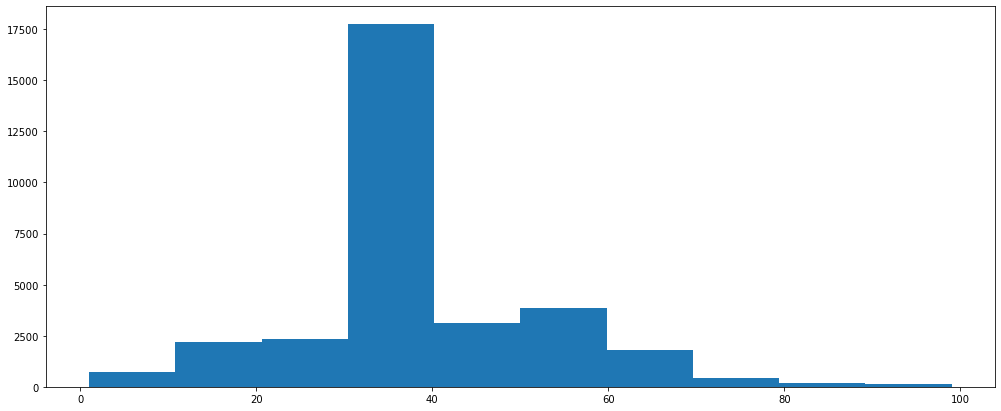

In [33]:
plt.figure(figsize=(17,7))
plt.hist(df['hours.per.week'])

# Labeling

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
df[['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex','native.country']]=df[['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex','native.country']].apply(le.fit_transform)

In [36]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,50,5,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
1,38,3,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
2,53,3,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
3,28,3,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K
4,37,3,284582,12,14,2,4,5,4,0,0,0,40,39,<=50K


In [37]:
df.workclass.unique()

array([5, 3, 6, 0, 1, 4, 7, 2])

In [38]:
df.education.unique()

array([ 9, 11,  1, 12,  6, 15,  7,  8,  5, 10, 14,  4,  0,  3, 13,  2])

In [39]:
df['native.country'].unique()

array([39,  5, 23, 19,  0, 26, 35, 33, 16,  9,  2, 11, 20, 30, 22, 31,  4,
        1, 37,  7, 25, 36, 14, 32,  6,  8, 10, 13,  3, 24, 41, 29, 28, 34,
       38, 12, 27, 40, 17, 21, 18, 15])

In [40]:
df.income=le.fit_transform(df.income)

In [41]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32555,27,3,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,3,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,3,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,3,201490,11,9,4,1,3,4,1,0,0,20,39,0
32559,52,4,287927,11,9,2,4,5,4,0,15024,0,40,39,1


In [42]:
df.income.value_counts()

0    24719
1     7841
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

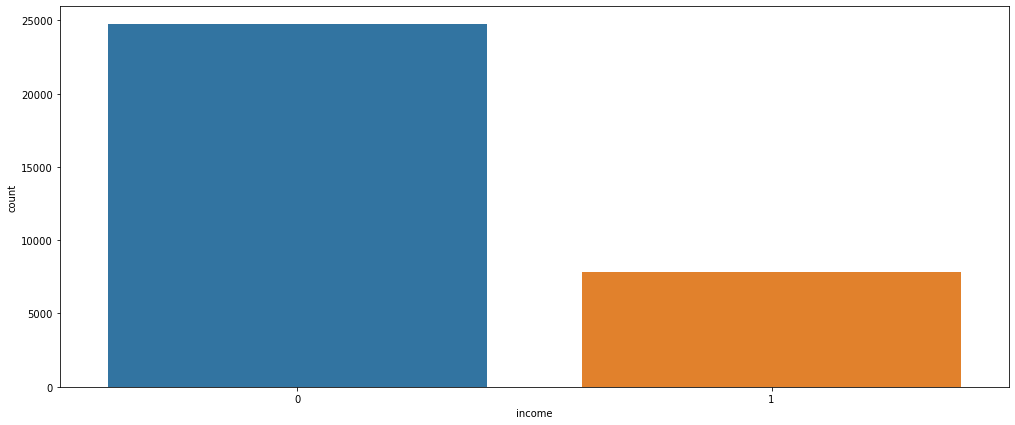

In [43]:
plt.figure(figsize=(17,7))
sns.countplot(df.income)

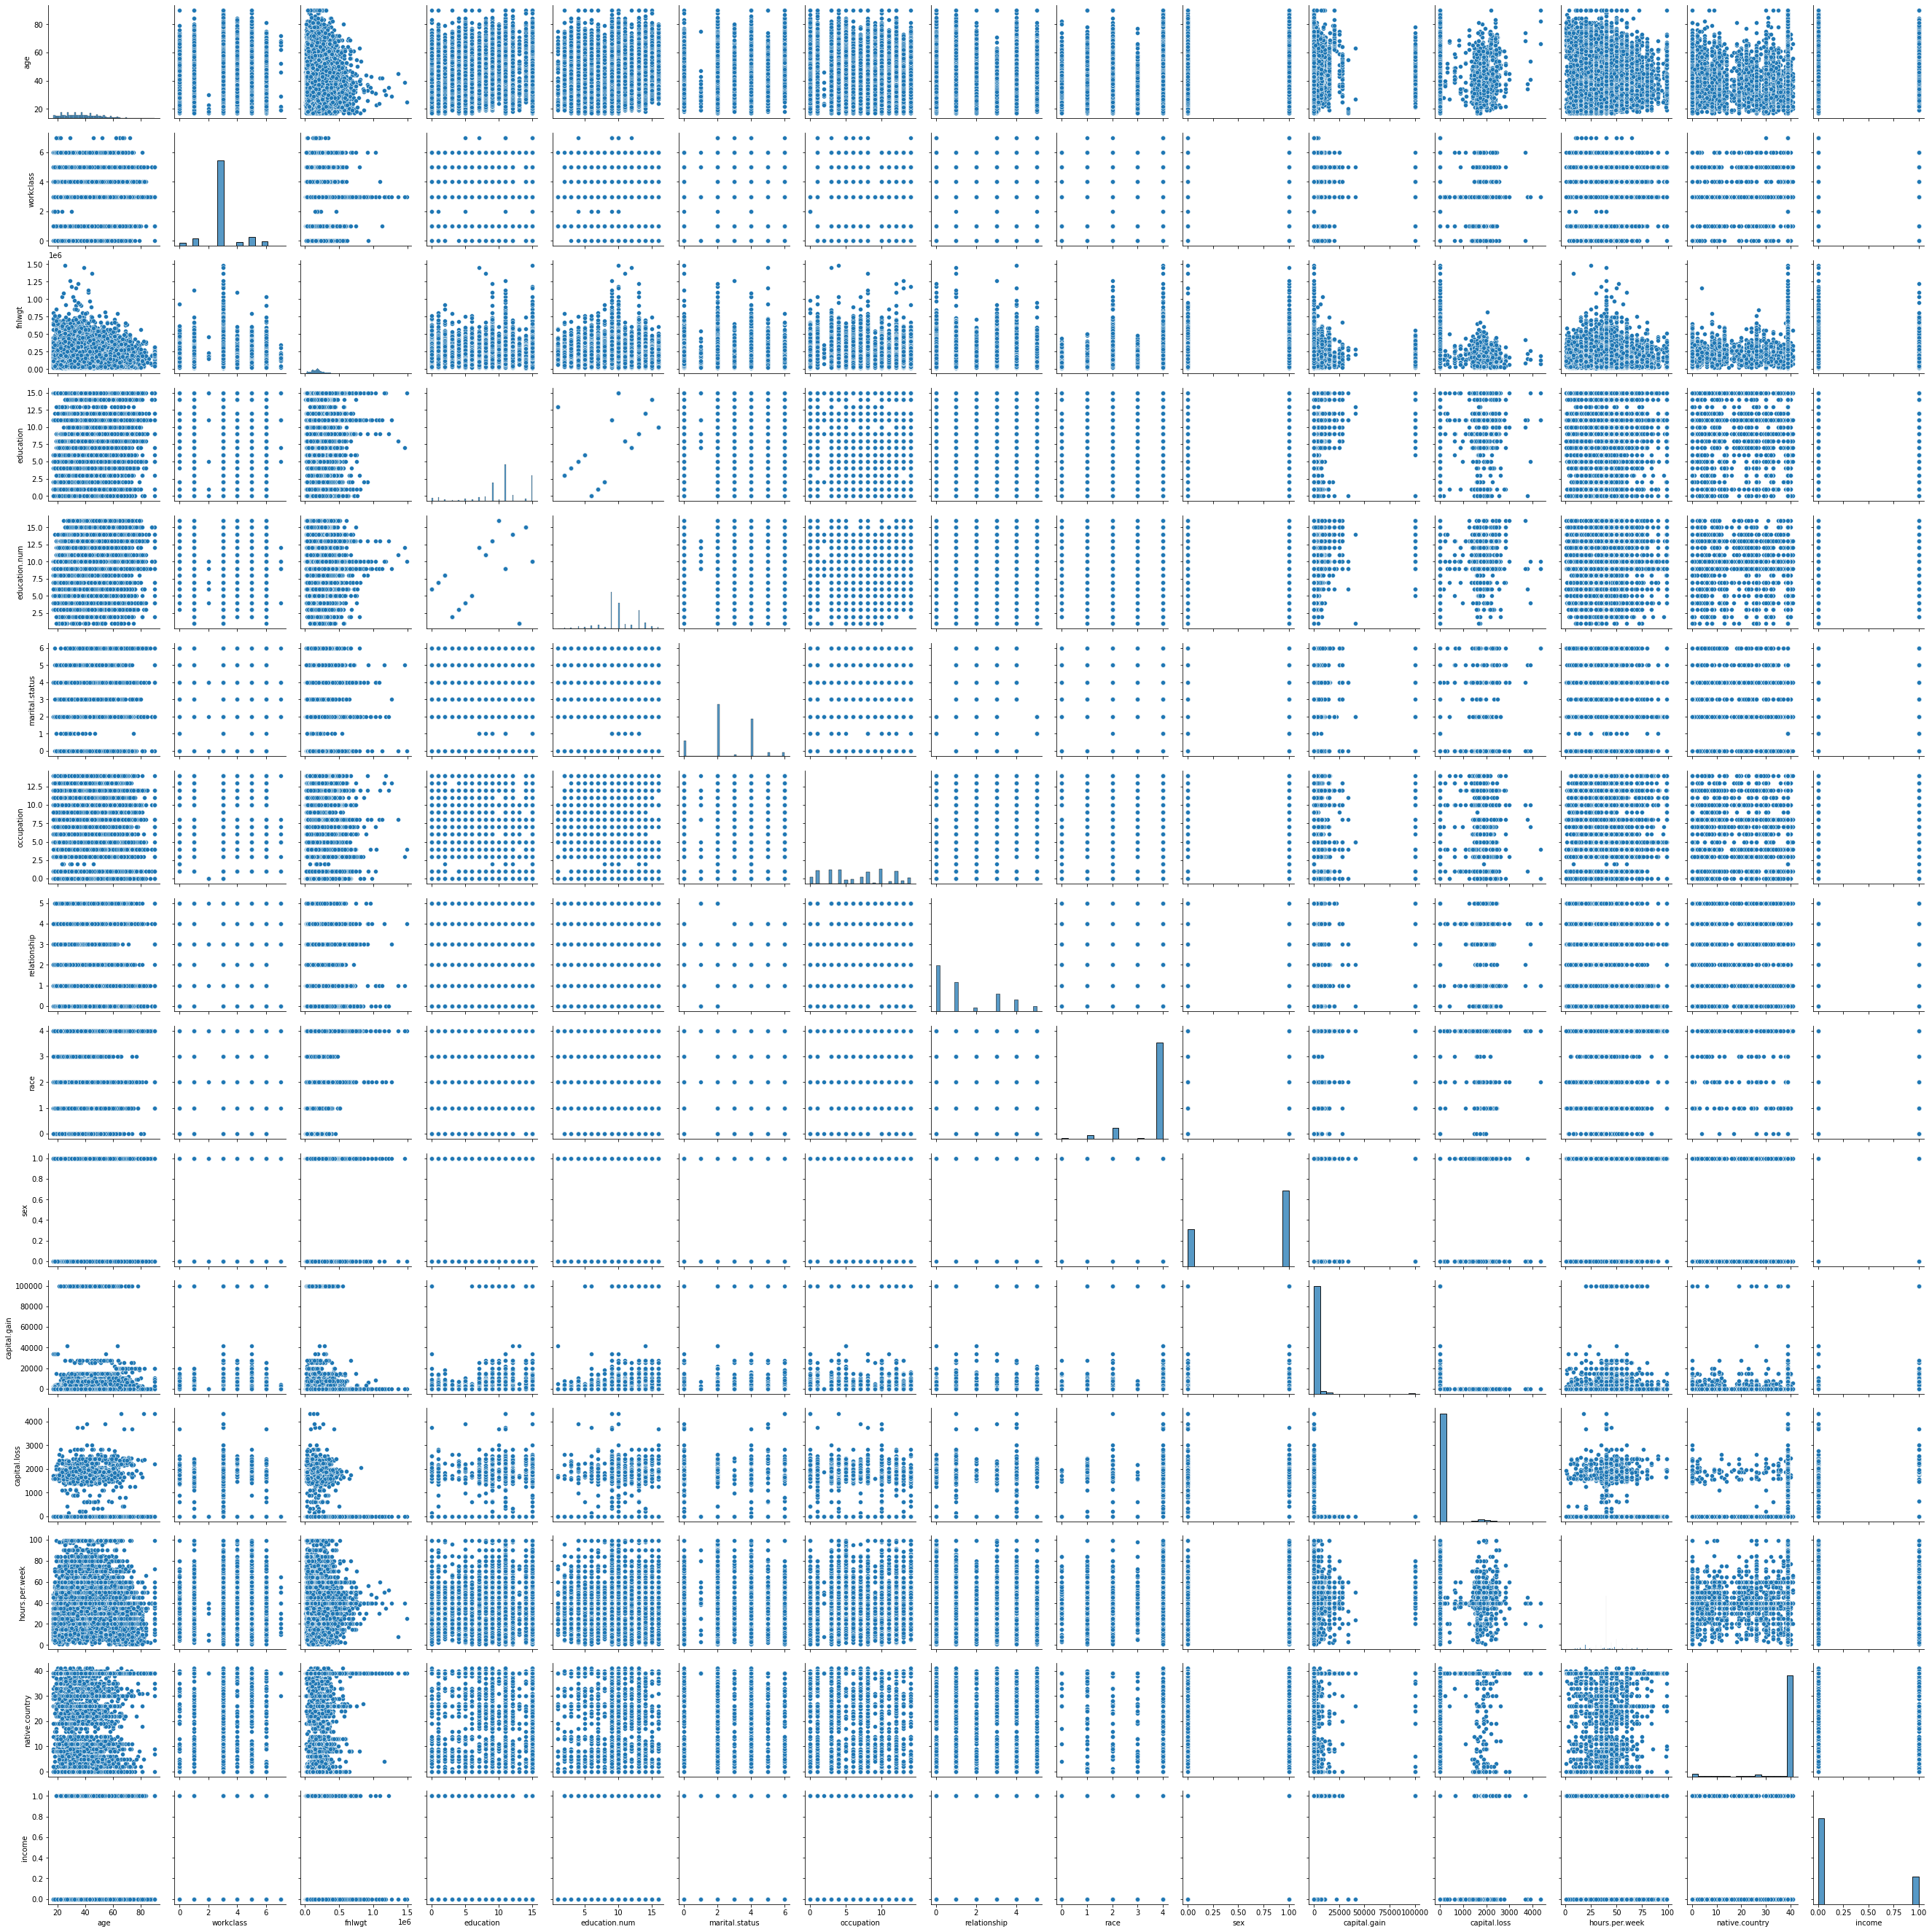

In [44]:
sns.pairplot(df)

# Correlation

In [45]:
df.corr()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.018664,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.004731,0.002739
fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
education.num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
marital.status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
occupation,-0.020946,0.018664,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

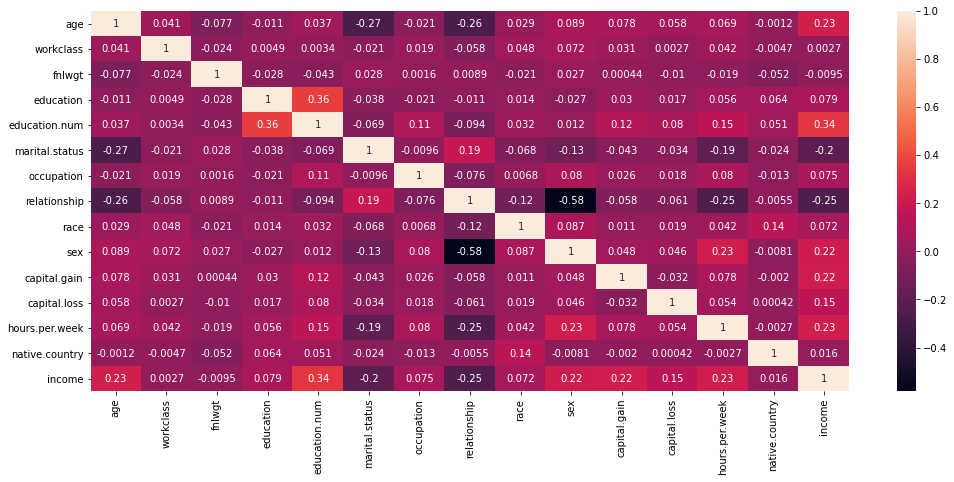

In [46]:
plt.figure(figsize=(17,7))
sns.heatmap(df.corr(),annot=True)

In this heatmap we can find the relationship between variables.......income is higly affected by education num and hours per week

# Removing outliers

In [47]:
from scipy.stats import zscore
outliers=np.abs(zscore(df))
print(np.where(outliers>3))
thresold=3

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [48]:
df_new=df[(outliers<3).all(axis=1)]

In [49]:
df.shape

(32560, 15)

In [50]:
df_new.shape

(27404, 15)

# Skewness

In [51]:
df_new.skew()

age                0.483480
workclass          0.085343
fnlwgt             0.626367
education         -0.957382
education.num     -0.143987
marital.status    -0.044465
occupation         0.130782
relationship       0.750885
race              -2.592704
sex               -0.684219
capital.gain       4.934585
capital.loss      29.318759
hours.per.week    -0.358517
native.country    -5.459254
income             1.324186
dtype: float64

In [52]:
for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [53]:

df['education']=np.sqrt(df['education'])

In [54]:
df_new.skew()

age                0.483480
workclass          0.085343
fnlwgt            -0.955301
education         -0.957382
education.num     -0.143987
marital.status    -0.044465
occupation         0.130782
relationship       0.253479
race              -2.592704
sex               -0.684219
capital.gain       3.113670
capital.loss      24.841019
hours.per.week    -0.358517
native.country    -5.459254
income             1.324186
dtype: float64

# Setting x and y variable

In [55]:
x=df_new.iloc[:,0:-1]
x.shape

(27404, 14)

In [56]:
y=df_new.iloc[:,-1]

In [57]:
y.shape

(27404,)

In [58]:
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Standardscaler

In [59]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [60]:
x.shape

(27404, 14)

In [61]:
x

array([[ 0.88337629,  1.73782   , -1.04972932, ..., -0.04042592,
        -2.41322238,  0.19394191],
       [-0.01145312, -0.07719303,  0.49450166, ..., -0.04042592,
         0.00796473,  0.19394191],
       [ 1.10708364, -0.07719303,  0.63212584, ..., -0.04042592,
         0.00796473,  0.19394191],
       ...,
       [ 1.47992923, -0.07719303, -0.07436233, ..., -0.04042592,
         0.00796473,  0.19394191],
       [-1.20455901, -0.07719303,  0.38425475, ..., -0.04042592,
        -1.7855072 ,  0.19394191],
       [ 1.03251452,  0.83031349,  0.96386404, ..., -0.04042592,
         0.00796473,  0.19394191]])

# Classification Process

In [62]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

In [63]:
def max_acc_score(clf,x,y):
    max_score=0
    for r in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        a_sc=accuracy_score(y_test,pred)
        if a_sc>max_score:
            max_score=a_sc
            a_state=r
            
    print('max score at random_state of',a_state,'is',max_score)
    return a_state

In [64]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_acc_score(lg,x,y)

max score at random_state of 97 is 0.8374384236453202


97

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=97)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)

In [66]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.8374384236453202


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4282
           1       0.71      0.44      0.54      1199

    accuracy                           0.84      5481
   macro avg       0.78      0.69      0.72      5481
weighted avg       0.82      0.84      0.82      5481



[[4062  220]
 [ 671  528]]


In [67]:
score=cross_val_score(lg,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.82430213 0.82904579 0.82959314 0.82813355 0.8270073 ]
0.8276163841379045
0.0018747519622275017


In [68]:
#auc_roc_score
pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.         0.         0.         ... 0.98225128 0.98225128 1.        ]


[0.00000000e+00 8.34028357e-04 4.67055880e-02 ... 9.99165972e-01
 1.00000000e+00 1.00000000e+00]


[1.98131443e+00 9.81314435e-01 9.10623672e-01 ... 3.88514158e-03
 3.87314893e-03 3.79627227e-04]


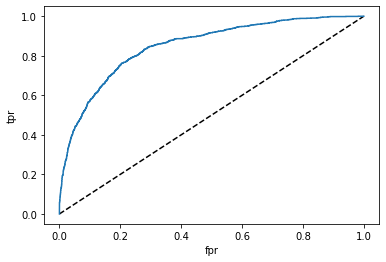

In [69]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [70]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.6944945558321799

# DecisiontreeClassifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt=DecisionTreeClassifier()
max_acc_score(dt,x,y)

max score at random_state of 45 is 0.8168217478562306


45

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)

In [74]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.8188286808976464


              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4299
           1       0.57      0.63      0.60      1182

    accuracy                           0.82      5481
   macro avg       0.73      0.75      0.74      5481
weighted avg       0.83      0.82      0.82      5481



[[3747  552]
 [ 441  741]]


In [75]:
score=cross_val_score(dt,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.80733443 0.80532749 0.80806422 0.81444992 0.80766423]
0.8085680592677823
0.0030883690484033574


In [76]:
#auc_roc_score
pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.         0.12840195 1.        ]


[0.         0.62690355 1.        ]


[2. 1. 0.]


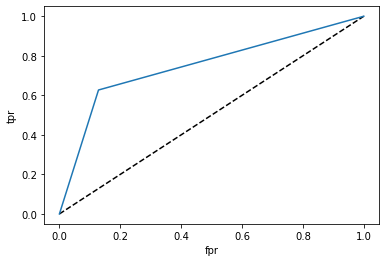

In [77]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='decision tree classifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [78]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.7492507996783575

# KNeighborsClassifiers

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
pr={'n_neighbors':range(1,20)}
gs=GridSearchCV(knn,pr,cv=5)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 19}

In [80]:
knn=KNeighborsClassifier(n_neighbors=19)
sc=max_acc_score(knn,x,y)

max score at random_state of 45 is 0.8514869549352307


In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [82]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.8514869549352307


              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4299
           1       0.68      0.59      0.63      1182

    accuracy                           0.85      5481
   macro avg       0.78      0.76      0.77      5481
weighted avg       0.85      0.85      0.85      5481



[[3966  333]
 [ 481  701]]


In [83]:
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.83451925 0.83944536 0.83506659 0.84327677 0.83905109]
0.8382718135776278
0.003205910022266085


In [84]:
#auc_roc_score
pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.         0.         0.00116306 0.00302396 0.00628053 0.01209584
 0.0209351  0.03372877 0.0474529  0.06140963 0.07745987 0.10048849
 0.12468016 0.15747848 0.19283554 0.2337753  0.28611305 0.34519656
 0.42381949 0.57013259 1.        ]


[0.         0.01861252 0.05414552 0.10406091 0.17005076 0.24534687
 0.32402707 0.39593909 0.45939086 0.52115059 0.59306261 0.65397631
 0.70050761 0.75126904 0.81049069 0.8536379  0.89086294 0.92893401
 0.95093063 0.98054146 1.        ]


[2.         1.         0.94736842 0.89473684 0.84210526 0.78947368
 0.73684211 0.68421053 0.63157895 0.57894737 0.52631579 0.47368421
 0.42105263 0.36842105 0.31578947 0.26315789 0.21052632 0.15789474
 0.10526316 0.05263158 0.        ]


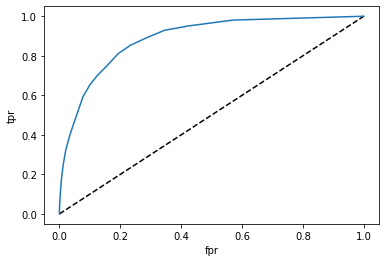

In [85]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='kneighbors classifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [86]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.7578013656817841

# SVC

In [87]:
from sklearn.svm import SVC
svc=SVC()
max_acc_score(svc,x,y)

max score at random_state of 46 is 0.852581645685094


46

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=46)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)

In [89]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.852581645685094


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4298
           1       0.73      0.50      0.59      1183

    accuracy                           0.85      5481
   macro avg       0.80      0.72      0.75      5481
weighted avg       0.84      0.85      0.84      5481



[[4086  212]
 [ 596  587]]


In [90]:
score=cross_val_score(svc,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.84108739 0.84583105 0.84765554 0.85093961 0.84507299]
0.8461173170221749
0.0032277956899048393


In [91]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.7234354220072085

# GradientBoostingClassifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb=GradientBoostingClassifier()
pr={'learning_rate':[.0001,.001,.01,.1,1],'n_estimators':[10,50,100,150,200,250,300]}
gs=GridSearchCV(gb,pr,cv=5)
gs.fit(x,y)
gs.best_params_

In [ ]:
gb=GradientBoostingClassifier(learning_rate=0.1,n_estimators=250)
max_acc_score(gb,x,y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)
gb.fit(x_train,y_train)
pred=gb.predict(x_test)

In [ ]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

In [ ]:
score=cross_val_score(gb,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

In [ ]:
#auc_roc_score
pred_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='gradientboost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [ ]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

# Saving The Model

In [ ]:
import joblib

In [ ]:
joblib.dump(gb,'gb_model_census_dataset.obj')